# Balanceo y modelamiento (Balance and modeling)


## Importar las librerías (Import packages)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,balanced_accuracy_score ,accuracy_score, classification_report, confusion_matrix

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

from collections import Counter
from pylab import rcParams

## Carga de la base de datos (Upload the database)

In [52]:
# Con el siguiente código se carga el archivo .csv donde está la base de datos de interés,especificando el tipo de variable
# que contienen algunas columnas.
# Tener especial cuidado con el separador utilizado, si es coma poner "sep=','" o si es punto y coma poner "sep=';'" 

# Load a file as a DataFrame and assign to df
df = pd.read_csv('../PROYECTO/Municipios_ActividadesEconomicas_concat.csv',sep=",",low_memory=False)

# Al tener NAs o valores faltantes en las siguientes columnas, se decide reemplazar estos por 0 para que al ajustar el modelo
# no haya inconvenientes.

# Change NAN to 0
df["TOTAL"]=df["TOTAL"].fillna(0)
df["GASTOS_IMPUESTOS"]=df["GASTOS_IMPUESTOS"].fillna(0)
df["PATRIMONIO"]=df["PATRIMONIO"].fillna(0)

# Este comando muestra los primeros 5 registros de la tabla 
df.head()

,Actividad_Economica,NIT,FEC-RENOVACION,ULT_REN,VLR-ESTABLEC.,DIRECCION,BARRIO,MUNICIPIO_Clean,PATRIMONIO,GASTOS_IMPUESTOS,AÑO,ESTADO,TOTAL,FCHA_RCDO,PRDO_GRVBLE_MES,NoOmiso
0,Deporte,#et3bthe,NaN,NaN,NaN,CL. 14 NRO 2 08,San Pedro,Cali,69000000.0,17011000.0,2015.0,PAGADO,271000.0,04/06/2015 12:00:00 a.m.,5.0,1.0
1,Deporte,#et3bthe,NaN,NaN,NaN,CL. 14 NRO 2 08,San Pedro,Cali,69000000.0,17011000.0,2015.0,PAGADO,192000.0,04/06/2015 12:00:00 a.m.,5.0,1.0
2,Deporte,#et3bthe,NaN,NaN,NaN,CL. 14 NRO 2 08,San Pedro,Cali,69000000.0,17011000.0,2015.0,PAGADO,227000.0,06/07/2015 12:00:00 a.m.,6.0,1.0
3,Deporte,#et3bthe,NaN,NaN,NaN,CL. 14 NRO 2 08,San Pedro,Cali,69000000.0,17011000.0,2015.0,PAGADO,246000.0,06/07/2015 12:00:00 a.m.,6.0,1.0
4,Deporte,#et3bthe,NaN,NaN,NaN,CL. 14 NRO 2 08,San Pedro,Cali,69000000.0,17011000.0,2015.0,GENERADO,267000.0,NaN,7.0,1.0


Teniendo en cuenta que se tiene información de más de 40 municipios, se decide generar una variable para indicar la subregión del Valle del Cauca a la que pertenece cada registro (Centro, Sur, Norte, Oriente, Occidente). A continuación se ejecuta ese proceso.


Taking into account that we have more than 40 municipalities, we created a *Region* variable that group all of them in 5 categories (Center, South, North, East, West).

In [53]:
df['Region'] =''
#REGION SUR/ SOUTH REGION
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Cali', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Candelaria', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Dagua', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Florida', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Jamundi', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='La cumbre', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Palmira', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Pradera', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Vijes', "Sur", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Yumbo', "Sur", df['Region'])
#REGION NORTE / NORTH REGION
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Alcala', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Ansermanuevo', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Argelia', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Bolivar', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='cartago', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='El aguila', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='El cairo', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='El dovio', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='La union', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='La victoria', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Obando', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Roldanillo', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Toro', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Ulloa', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Versalles', "Norte", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Zarzal', "Norte", df['Region'])
#REGION CENTRO/ CENTER REGION
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Andalucia', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Buga', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Bugalagrande', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Calima', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='El cerrito', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Ginebra', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Guacari', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Restrepo', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Riofrio', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='San pedro', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Trujillo', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Tulua', "Centro", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Yotoco', "Centro", df['Region'])
#REGION OCCIDENTE / WEST REGION
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Buenaventura', "Occidente", df['Region'])
#REGION ORIENTE / EAST REGION
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Caicedonia', "Oriente", df['Region'])
df['Region'] = np.where(df['MUNICIPIO_Clean'] =='Sevilla', "Oriente", df['Region'])

array(['Sur', 'Norte', '', 'Oriente', 'Centro', 'Occidente'], dtype=object)

In [15]:
print("La base de datos que vamos a estudiar cuenta con",df.shape[0],"filas y",df.shape[1],"columnas.")
print("The database has",df.shape[0],"rows and",df.shape[1],"columns.")

La base de datos que vamos a estudiar cuenta con 16107 filas y 17 columnas.
The database has 16107 rows and 17 columns.


La variable de interés (en adelante llamada $y$) es **"NoOmiso"**, que da información de si un contribuyente es *ha pagado* (1) o *no ha pagado* (0). La frecuencia de cada una de las categorías se muestra enseguida:

Our variable of interest ($y$) is **"NoOmiso"** because is the one that shows whether or not a taxpayer is *omiso*.

Cantidad de no omisos 5150 
Cantidad de omisos 10957
Number of non-taxpayers 5150 
Number of taxpayers 10957


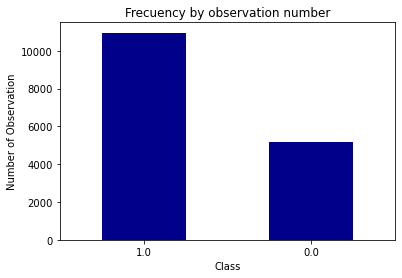

In [71]:
count_classes=pd.value_counts(df['NoOmiso'],sort= True)
count_classes.plot(kind="bar",rot=0,color="darkblue")
plt.xticks(range(2))
plt.title("Frecuency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observation")

o=pd.value_counts(df['NoOmiso'], sort = True)

print("Cantidad de no omisos",o[0],"\nCantidad de omisos",o[1])

print("Number of non-taxpayers",o[0],"\nNumber of taxpayers",o[1])

Como se puede notar, las categorías están extremandamente desbalanceadas así que antes de ajustar algún modelo de clasificación se debe balancear la muestra. Para ello se explorarán algunas alternativas: 1. Modificar los parámetros del modelo para que penalice la clasificación de la clase mayoritaria durante el entrenamiento y 2. Generar muestras artificiales que permitan "equilibrar" los conjuntos de datos, esto puede ser por submuestreo o supermuestreo. 
Cabe aclarar que se probabarán siguientes modelos de clasificación: Regresión Logística, Árboles de decisión y Random Forest (clásicos, balanceados y ponderados).


As you can see, we have an unbalanced dataset so before trying some classification model we must balance the data. For that matter we will use 2 approaches: 1. Modifying the model parameters so that it penalizes the classification of the majority class and 2. Applying some tecniques of over and undersampling. 
We'll compare the results of different classification models such as Logistic regression, Decision trees and Random forest (classic, balanced and weighted).

In [61]:
# Se crea una segunda base de datos utilizando solo las variables que realmente se incluirán en el modelo. 
# A las variables cuantitativas se les normaliza y a las categóricas se les transforma en dummies (donde toman el valor de 1 
# si cumplen con la cualidad y 0 si no).

# Create a new dataframe based on df using the independent variables useful for the modeling. We use one-hot encoding for the 
# categorical variables.

df2=df[["Actividad_Economica","Region","NoOmiso","GASTOS_IMPUESTOS"]]#,"TOTAL","PATRIMONIO"]]
df2=pd.concat([#(df2['TOTAL']- df['TOTAL'].mean())/df['TOTAL'].std(),
               (df2["GASTOS_IMPUESTOS"]- df["GASTOS_IMPUESTOS"].mean())/df["GASTOS_IMPUESTOS"].std(),
               #(df2["PATRIMONIO"]- df["PATRIMONIO"].mean())/df["PATRIMONIO"].std(),
               df2['NoOmiso'],pd.get_dummies(df2['Actividad_Economica'],prefix='ActEc', drop_first=True),
               pd.get_dummies(df2['Region'], prefix='Reg', drop_first=True)],axis=1)

# Definición de etiquetas. Y= variable dependiente  X = Variables independientes 
y=df2["NoOmiso"]
X=df2.drop("NoOmiso",axis=1)


In [19]:
#definimos funciona para mostrar los resultados - Sin importar el modelo
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

### Regresión Logística (Logistic Regression)

#### Con los datos desbalanceados originales (With original dataset)


In [72]:
#Dividimos en sets de entrenamiento (70$%) y test (30$%)
#Selection of train (70%) and test (30$%) sets

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
print("La cantidad de registros para entrenamiento es",X_train.shape[0],"y para test",X_test.shape[0])
print("Number of rows in the train set",X_train.shape[0],"and in the test set",X_test.shape[0])

clf_base = LogisticRegression(random_state=1,solver="newton-cg")
clf_base.fit(X_train, y_train)
pred_y = clf_base.predict(X_test)
mostrar_resultados(y_test, pred_y)
#print (classification_report(y_test, pred_y))

La cantidad de registros para entrenamiento es 11274 y para test 4833
Number of rows in the train set 11274 and in the test set 4833
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1514
         1.0       0.96      0.91      0.93      3319

    accuracy                           0.91      4833
   macro avg       0.89      0.91      0.90      4833
weighted avg       0.92      0.91      0.91      4833



#### Usando penalizaciones (Using penaly in the model)

In [23]:
lrp_base = LogisticRegression(random_state=1,solver="newton-cg",penalty='l2',class_weight="balanced")
lrp_base.fit(X_train, y_train)
predlrp_y = lrp_base.predict(X_test)
print (classification_report(y_test, predlrp_y))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1566
         1.0       0.95      0.92      0.93      3267

    accuracy                           0.91      4833
   macro avg       0.90      0.91      0.90      4833
weighted avg       0.92      0.91      0.91      4833



#### Aplicando submuestreo (Applying undersampling)

In [24]:
nr = NearMiss()
X_under_train, y_under_train = nr.fit_sample(X_train, y_train)

print ("Distribución antes de submuestreo {}".format(Counter(y_train)))
print ("Distributión después de submuestreo {}".format(Counter(y_under_train)))

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_under_train)))

lrp_under = LogisticRegression(random_state=1,solver="newton-cg")
lrp_under.fit(X_under_train, y_under_train)
predlrp_y_under = lrp_under.predict(X_test)
mostrar_resultados(y_test, predlrp_y_under)

#print (classification_report(y_test, predlrp_y_under))
#round(balanced_accuracy_score(y_test, predlrp_y_under),4)

Distribución antes de submuestreo Counter({1.0: 7690, 0.0: 3584})
Distributión después de submuestreo Counter({0.0: 3584, 1.0: 3584})
Distribution before resampling Counter({1.0: 7690, 0.0: 3584})
Distribution after resampling Counter({0.0: 3584, 1.0: 3584})
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1566
         1.0       0.95      0.92      0.93      3267

    accuracy                           0.91      4833
   macro avg       0.90      0.91      0.90      4833
weighted avg       0.92      0.91      0.91      4833



0.9121

#### Aplicando supermuestreo aleatorio (Applying random oversampling)

In [25]:
os =  RandomOverSampler()
X_over_train, y_over_train = os.fit_sample(X_train, y_train)
 
print ("Distribución antes de submuestreo {}".format(Counter(y_train)))
print ("Distributión después de submuestreo {}".format(Counter(y_over_train)))

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_over_train)))

lrp_over = LogisticRegression(random_state=1,solver="newton-cg")#,penalty='l2',class_weight="balanced")
lrp_over.fit(X_over_train, y_over_train)
predlrp_y_over = lrp_over.predict(X_test)
print (classification_report(y_test, predlrp_y_over))

Distribución antes de submuestreo Counter({1.0: 7690, 0.0: 3584})
Distributión después de submuestreo Counter({1.0: 7690, 0.0: 7690})
Distribution before resampling Counter({1.0: 7690, 0.0: 3584})
Distribution after resampling Counter({1.0: 7690, 0.0: 7690})
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1566
         1.0       0.95      0.92      0.93      3267

    accuracy                           0.91      4833
   macro avg       0.90      0.91      0.90      4833
weighted avg       0.92      0.91      0.91      4833



#### Aplicando supermuestreo SMOTENC (Applying Synthetic Minority Oversampling Technique for Nominal and Continous (SMOTENC))

In [28]:
smote_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

X_train_smc,X_test_smc,y_train_smc,y_test_smc=train_test_split(X_resampled,y_resampled,train_size=0.7)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_smc)))
 
lrp_smotenc = LogisticRegression(random_state=1,solver="newton-cg")
lrp_smotenc.fit(X_train_smc, y_train_smc)
predlrp_y_smotenc = lrp_smotenc.predict(X_test_smc)
print (classification_report(y_test_smc, predlrp_y_smotenc))

[(0.0, 10957), (1.0, 10957)]
Distribution before resampling Counter({1.0: 7690, 0.0: 3584})
Distribution labels after resampling Counter({0.0: 7730, 1.0: 7609})
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      3227
         1.0       0.91      0.90      0.91      3348

    accuracy                           0.90      6575
   macro avg       0.90      0.90      0.90      6575
weighted avg       0.90      0.90      0.90      6575



### Árbol de decisión (Decision Tree)

#### Con los datos desbalanceados originales (With original dataset)


In [30]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X_train,y_train)
preddtc_y=dtc.predict(X_test)
print (classification_report(y_test, preddtc_y))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1566
         1.0       0.96      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.93      0.92      4833
weighted avg       0.93      0.93      0.93      4833



#### Aplicando submuestreo (Applying undersampling)

In [31]:
dtc_under = DecisionTreeClassifier()
dtc_under.fit(X_under_train, y_under_train)
preddtc_y_under = dtc_under.predict(X_test)
print (classification_report(y_test, preddtc_y_under))

              precision    recall  f1-score   support

         0.0       0.59      0.92      0.72      1566
         1.0       0.95      0.70      0.80      3267

    accuracy                           0.77      4833
   macro avg       0.77      0.81      0.76      4833
weighted avg       0.83      0.77      0.78      4833



#### Aplicando supermuestreo aleatorio (Applying random oversampling)

In [32]:
dtc_over = DecisionTreeClassifier()
dtc_over.fit(X_over_train, y_over_train)
preddtc_y_over = dtc_over.predict(X_test)
print (classification_report(y_test, preddtc_y_over))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1566
         1.0       0.96      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.93      0.92      4833
weighted avg       0.93      0.93      0.93      4833



#### Aplicando supermuestreo SMOTENC (Applying Synthetic Minority Oversampling Technique for Nominal and Continous (SMOTENC))

In [33]:
dtc_smotenc = DecisionTreeClassifier()
dtc_smotenc.fit(X_train_smc, y_train_smc)
preddtc_y_smotenc = dtc_smotenc.predict(X_test_smc)
mostrar_resultados(y_test_smc, preddtc_y_smotenc)
#round(balanced_accuracy_score(y_test_smc, preddtc_y_smotenc),4)
#print (classification_report(y_test_smc, preddtc_y_smotenc))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      3227
         1.0       0.91      0.93      0.92      3348

    accuracy                           0.92      6575
   macro avg       0.92      0.92      0.92      6575
weighted avg       0.92      0.92      0.92      6575



0.9216

### Random Forest

#### Con los datos desbalanceados originales (With original dataset)


In [34]:
rfc=RandomForestClassifier(max_depth=3, random_state=0)
rfc=rfc.fit(X_train,y_train)
predrfc_y=rfc.predict(X_test)
print (classification_report(y_test, predrfc_y))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1566
         1.0       0.95      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.92      0.92      4833
weighted avg       0.93      0.93      0.93      4833



#### Aplicando submuestreo (Applying undersampling)

In [35]:
rfc_under = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rfc_under.fit(X_under_train, y_under_train)
predrfc_y_under = rfc_under.predict(X_test)
print (classification_report(y_test, predrfc_y_under))

              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80      1566
         1.0       0.95      0.83      0.89      3267

    accuracy                           0.86      4833
   macro avg       0.83      0.87      0.84      4833
weighted avg       0.88      0.86      0.86      4833



#### Aplicando supermuestreo aleatorio (Applying random oversampling)

In [36]:
rfc_over = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rfc_over.fit(X_over_train, y_over_train)
predrfc_y_over = rfc_over.predict(X_test)
print (classification_report(y_test, predrfc_y_over))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1566
         1.0       0.95      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.92      0.92      4833
weighted avg       0.93      0.93      0.93      4833



#### Aplicando supermuestreo SMOTENC (Applying Synthetic Minority Oversampling Technique for Nominal and Continous (SMOTENC))

In [37]:
rfc_smotenc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rfc_smotenc.fit(X_train_smc, y_train_smc)
predrfc_y_smotenc = rfc_smotenc.predict(X_test_smc)
print (classification_report(y_test_smc, predrfc_y_smotenc))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      3227
         1.0       0.91      0.93      0.92      3348

    accuracy                           0.92      6575
   macro avg       0.92      0.92      0.92      6575
weighted avg       0.92      0.92      0.92      6575



#### Random Forest Balanceado (Balanced Random Forest)

In [40]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
brf.fit(X_train, y_train) 
predbrf_y = brf.predict(X_test)
print (classification_report(y_test, predbrf_y))
round(balanced_accuracy_score(y_test, predbrf_y),4)
#mostrar_resultados(y_test, predbrf_y)

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1566
         1.0       0.95      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.92      0.92      4833
weighted avg       0.93      0.93      0.93      4833



0.9244

#### Random Forest Ponderado (Weighted Random Forest)

In [39]:
# Usando la muestra original ( Using original samples)
rfw = RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample",criterion='gini')
rfw.fit(X_train, y_train)
predrfw_y = rfw.predict(X_test)
print (classification_report(y_test, predrfw_y))
#mostrar_resultados(y_test, predrfw_y)
round(balanced_accuracy_score(y_test, predrfw_y),4)
# Usando la muestra generada de SMOTENC ( Using SMOTENC samples)
#rfw_smc = RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample",criterion='gini')
#rfw_smc.fit(X_train_smc, y_train_smc) 
#predrfw_y_smc = rfw_smc.predict(X_test_smc)
#print (classification_report(y_test_smc, predrfw_y_smc))


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1566
         1.0       0.96      0.94      0.95      3267

    accuracy                           0.93      4833
   macro avg       0.92      0.93      0.92      4833
weighted avg       0.93      0.93      0.93      4833



0.9268

Luego de hacer la prueba de los diferentes modelos y en miras a revisar el performance de "los más adecuados" se procede a generar curvas de ROC conjuntas, aplicando 10 interacciones para la validación cruzada.

After testing different models we will check the performance of the best ones using ROC curves and a 10-fold cross validation.


In [66]:
def cv_roc_tree(X, y, n_split, algo='Tree'):
    
    cv = StratifiedKFold(n_split)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        if algo == 'Tree':
            probas_ = dtc_under.predict_proba(X)  #dtc_under / smotenc
        elif algo == 'Forest':
            probas_ = rfw.predict_proba(X)  #rfc_under
        else:
            probas_ = lrp_under.predict_proba(X)
                                 
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y, probas_[:,1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    return tprs, aucs, mean_fpr

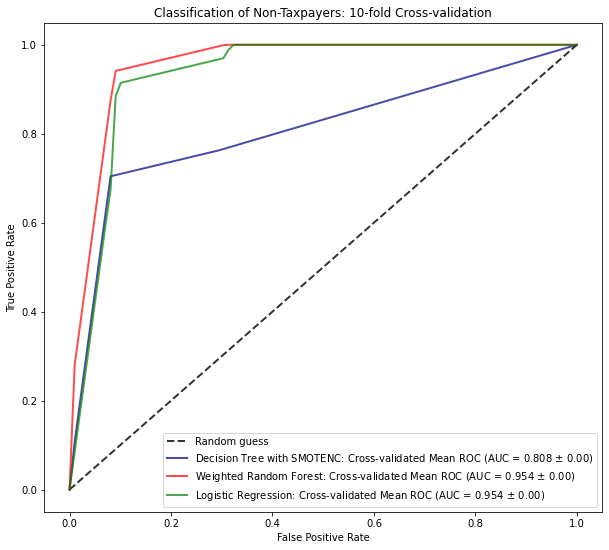

In [68]:
tprs_t, aucs_t, mean_fpr_t = cv_roc_tree(X, y,10,algo='Tree')
tprs_f, aucs_f, mean_fpr_f = cv_roc_tree(X, y,10,algo='Forest')
tprs_l, aucs_l, mean_fpr_l = cv_roc_tree(X, y,10,algo='Logit')

plt.figure(figsize=(10,9))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random guess', alpha=.8)

mean_tpr_t = np.mean(tprs_t, axis=0)
mean_tpr_f = np.mean(tprs_f, axis=0)
mean_tpr_l = np.mean(tprs_l, axis=0)
mean_tpr_t[-1] = 1.0
mean_tpr_f[-1] = 1.0
mean_tpr_l[-1] = 1.0

mean_auc_t = auc(mean_fpr_t, mean_tpr_t)
mean_auc_f = auc(mean_fpr_f, mean_tpr_f)
mean_auc_l = auc(mean_fpr_l, mean_tpr_l)
std_auc_t = np.std(aucs_t)
std_auc_f = np.std(aucs_f)
std_auc_l = np.std(aucs_l)

plt.plot(mean_fpr_t, mean_tpr_t, color='navy', lw=2, alpha=.7,   #linestyle='--'
        label=f"Decision Tree with SMOTENC: Cross-validated Mean ROC (AUC = {mean_auc_t:0.3f} $\pm$ {std_auc_t:0.2f})")
plt.plot(mean_fpr_f, mean_tpr_f, color='red', lw=2, alpha=.7,
         label=f"Weighted Random Forest: Cross-validated Mean ROC (AUC = {mean_auc_f:0.3f} $\pm$ {std_auc_f:0.2f})")
plt.plot(mean_fpr_l, mean_tpr_l, color='green', lw=2, alpha=.7,
         label=f"Logistic Regression: Cross-validated Mean ROC (AUC = {mean_auc_f:0.3f} $\pm$ {std_auc_f:0.2f})")


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Classification of Non-Taxpayers: 10-fold Cross-validation')
plt.show()

In [51]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, SVG

covariates=['GASTOS_IMPUESTOS', 'ActEc_Licor', 'ActEc_Loterias', 'Reg_Centro',
       'Reg_Norte', 'Reg_Occidente', 'Reg_Oriente', 'Reg_Sur']
dot_data = StringIO()
export_graphviz(dtc_smotenc, out_file=dot_data, feature_names = covariates,
                class_names=['Taxpayers', 'Non-Taxpayers'],  
                filled=True, rounded=True,
                special_characters=True, 
                impurity='gini', proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found